### IDs:
Insert yours IDs to the cell below

ID #1:

ID #2:


In [7]:
import warnings
import numpy as np
import scipy
from scipy import stats, log
import matplotlib.pyplot as plt
from scipy.stats import lognorm, kendalltau, pearsonr, spearmanr
import random
import matplotlib.mlab as mlab
import seaborn as sns
from scipy.stats import norm
import matplotlib.mlab as mlab
import pandas as pd


warnings.filterwarnings('ignore')


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

### Question 1 - Correlations (15 points)

Provide example datapoints matching the following descriptions. Each example should be constructed over n=50 datapoints. Provide a table description of the example data as well as a jointplot (see example below). 
If you think that the situation described is impossible then clearly explain why (you don’t need to give a rigorous proof).<br>
Pearson(x,y) = Pearson correlation<br>
τ(x,y) = Kendall rank correlation<br>
ρ(x,y) = Spearman rank correlation <br>
<img src="jointplot.png">

#### 1.A
Data in which  $Pearson(x,y) < -0.9$ but where $n-1$ points can be selected so that for the vectors restricted to those we have $Pearson(x_{n-1},y_{n-1}) > -0.2$

#### 1.B
Data with τ(x,y) > ρ(x,y) + 0.45

#### 1.C
Data with τ(x,y) < ρ(x,y) – 0.45

#### 1.D
Data with Pearson(x,y) < ρ(x,y) – 0.6

#### 1.E
Data with Pearson(x,y) > ρ(x,y) + 1.2

#### 1.F
Data with τ(x,y) < ρ(x,y) – 1.2 

### Question 2 - Analysis of the UCI Heart Disease dataset  (40 points)

Perform data analysis on the UCI Heart Disease Dataset
References:
1. Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
2. David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database."
3. Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.

Use the following links to find the details of the data: 
1. https://archive.ics.uci.edu/ml/datasets/heart+disease
2. https://www.kaggle.com/ronitf/heart-disease-uci

In the follwong cells write a report for your analysis. In your report provide a clear description of the analysis methods and of the results. This should include a graphical representation of the results and the conclusions. Provide p-values or other indicators of the statistical significance where appropriate. <br>
Design your report to be concise but still cover interesting findings.

There are missing values in the data. Find them and impute them by using the median (for numerical features) or the mode (for categorical features) value of the relevant feature (column).
Address the following questions:
* Using confidence intervals determine for which numerical features you can state with confidence of 95% that the healthy population (target = 0) mean is larger/smaller than the disease population (target = 1) mean. 
* Draw histograms for each numerical feature. Inspect the observed distributions and then use MLE to plot, on the same figures, fits of the distributions.
* For each pair of numerical feature, calculate correlations and indicate whether you find them significant. For select pairs, with significant correlations, draw joint plot with marginal histograms (see Seaborn joint plot) and find bivariate normal fits. Then use the example code below to draw plots of the bivariate pdfs (you may edit the code as you see fit).
* Are there pairs that are significantly correlated in males but not in females? The opposite? How about healthy vs disease? Can you graphically represent this?
* For each numerical feature, except age, plot the distribution for this feature against bins of age. In each bin provide a split violin plot, with different colors for healthy and disease.

Suggest, state and address at least one original question.


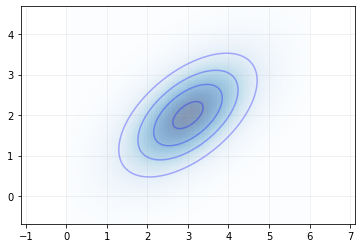

In [1]:
# Example code for bivariate pdfs
from scipy.stats import multivariate_normal as mn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_2d_Gaussian_pdf(means, cov):
    n = 100
    x1 = np.linspace(means[0] - 3 * np.sqrt(cov[0][0]), means[0] + 3 * np.sqrt(cov[0][0]), n)
    x2 = np.linspace(means[1] - 3 * np.sqrt(cov[1][1]), means[1] + 3 * np.sqrt(cov[1][1]), n)
    x1_v, x2_v = np.meshgrid(x1, x2)
    Xgrid = np.vstack([x1_v.ravel(), x2_v.ravel()]).T
    Y = mn.pdf(Xgrid, means, cov)
    fig, ax = plt.subplots()
    ax.pcolorfast(x1, x2, Y.reshape(x1_v.shape), alpha=0.5, cmap='Blues')
    ax.contour(x1_v, x2_v, Y.reshape(x1_v.shape),
               levels=[0.05, 0.1, 0.15, 0.2], alpha=0.3, colors='b')
    ax.axis('equal')
    ax.grid(alpha=0.2)
    plt.show()
    
means = [3, 2]
cov = [[1, 0.5], [0.5, 0.8]]
plot_2d_Gaussian_pdf(means, cov)

### Question 3 - Heavy Tailed distributions (10 points)

Recall the definition of Heavy Tailed distribtion from the lectures.

*A distribution is said to have a heavy right tail if its tail probabilities vanish slower than any exponential*
$$ \forall t>0, \lim_{x\to\infty} e^{tx}P(X>x)=\infty $$

#### 3.A
Does the standard normal distribution have a heavy right tail? prove your answer.

Answer: No

Standard normal distribution: $f(x)=\frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}$


#### 3.B
Does the standard log-normal distribution have a heavy right tail? prove your answer.

Answer: Yes

Standard log-normal distribution: $f(x)=\frac{1}{x\sqrt{2\pi}}e^{-\frac{(\ln{x})^2}{2}}$    

### Question 4 - CLT for Markov chains (20 points)

In this exercise you will construct trajectories of Markovian dice rolling results in the following way.<br>
The first roll, $X_0$, is $U(1...6)$, i.e. $P(X_0=i)=temp_T[0]*6\pi_0(i)=1/6, \forall i\in{\{1,..,6\}}$<br>
After i rolls are determined the $i+1^{st}, X_{i+1},$ is drawn according to the row that corresponds to the value of $X_i$ in the matrix $T$ below. <br>
In other words, $T$ is the transition matrix of a Markov chain and the initial distribution is uniform.

\begin{equation*}
T = 
\begin{pmatrix}
0.4 & 0.2 & 0.1 & 0 & 0.1 & 0.2 \\
0.2 & 0.4 & 0.2 & 0.1 & 0 & 0.1 \\
0.1 & 0.2 & 0.4 & 0.2 & 0.1 & 0 \\
0 & 0.1 & 0.2 & 0.4 & 0.2 & 0.1 \\
0.1 & 0 & 0.1 & 0.2 & 0.4 & 0.2 \\
0.2 & 0.1 & 0 & 0.1 & 0.2 & 0.4
\end{pmatrix}
\end{equation*}

In [115]:
def round_state(p_list):
    return np.array([round(p,3) for p in p_list])

In [120]:
T = np.array([[0.4, 0.2, 0.1, 0, 0.1, 0.2],
              [0.2, 0.4, 0.2, 0.1, 0, 0.1],
              [0.1, 0.2, 0.4, 0.2, 0.1, 0],
              [0, 0.1, 0.2, 0.4, 0.2, 0.1],
              [0.1, 0, 0.1, 0.2, 0.4, 0.2],
              [0.2, 0.1, 0, 0.1, 0.2, 0.4]])
pi_0 = np.array([1/6]*6)
    
values = np.array(list(range(1, 6+1)))

#### First we wanted to see if p is a stationary state
We did it, like we saw in class, by taking the initial state and dot product it by T.
If the result we get is again p, than we know that p is indeed a stationary state.

In [124]:
pi_next = round_state(pi_0.dot(T))
ic(pi_next)
if list(round_state(pi_0)) == list(round_state(pi_next)):
    print("pi_0 is the stationary state")

ic| pi_next: array([0.167, 0.167, 0.167, 0.167, 0.167, 0.167])


pi_0 is the stationary state


In [126]:
def create_trajectory_generator(length):
    def trajectory_generator():
        while True:
            yield stats.rv_discrete(name="curr pi", values=(values, pi_0)).rvs(size=length)
    return trajectory_generator()
            

def trajectory_estimator(num_of_trajectories, length):
    trajectory_generator = create_trajectory_generator(length)
    return [np.average(np.array(next(trajectory_generator))) for _ in range(num_of_trajectories)]


def experiment(num_of_trajectories, length, bins=20):
    avgs = trajectory_estimator(num_of_trajectories, length)
    
    n, bins, patches = plt.hist(avgs, bins, alpha=0.75)
    (mu, sigma) = norm.fit(avgs)
    print("Empirical Mean = {} STD = {}".format(round(mu,3), round(sigma,3)))
    plt.show()
    
    return avgs, mu, sigma


def fit_curve_plot(avgs, mu, sigma):
    ax = sns.distplot(avgs, bins=25, kde_kws=dict(bw=0.5), hist_kws= dict(edgecolor="k"))
    ax.set(xlabel='bins', ylabel='Frequency')
    plt.show()

#### 4.A
Construct 1000 trajectories, each of length 30.
1. What do you expect the average value of all 30 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?

1. Since we saw that this is a stationary process, we expect that the distribution to remain uniform in all states, and so the expectation should be: 3.5 
2. See graph below.
3. We have here basically a 1000 RV that are independent of each other, and so by the CLT, the distribution should be Normal distribution with mean 3.5

Empirical Mean = 3.484 STD = 0.312


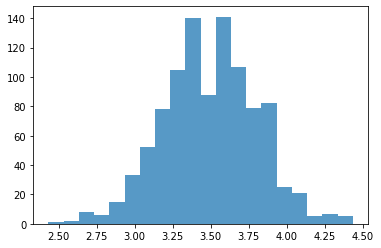

In [127]:
avgs_a, mu_a, sigma_a = experiment(1000, 30)

##### 4.B
Construct 1000 trajectories, each of length 500.
1. What do you expect the average value of all 500 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?

1. Since we saw that this is a stationary process, we expect that the distribution to remain uniform in all states, and so the expectation should be: 3.5 
2. See graph below.
3. We have here basically a 1000 RV that are independent of each other, and so by the CLT, the distribution should be Normal distribution with mean 3.5

Empirical Mean = 3.502 STD = 0.077


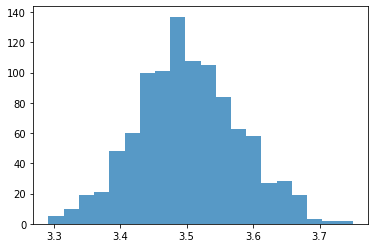

In [95]:
avgs_b, mu_b, sigma_b = experiment(1000, 500)

#### 4.C
Draw normal fit curves on your two histograms.

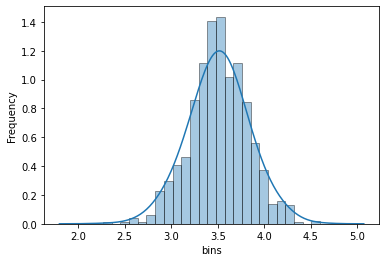

In [97]:
fit_curve_plot(avgs_a, mu_a, sigma_a)

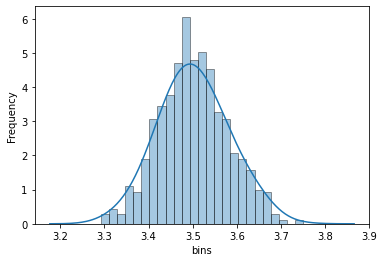

In [98]:
fit_curve_plot(avgs_b, mu_b, sigma_b)

#### 4.D
Write a python code to calculate $Cov(X_0,X_i)$ for $i=1,..,500$ based on $\pi_0$ and $T$. 

Compute the values for our case.

answer:</br>
    We will use the formula: $Cov(X,Y)=E(XY)-E(X) \cdot E(Y)$

In [133]:
from icecream import ic
import time
from math import log

def cov_i(values, i, p0, T):
    assert(i > 0)
    xy = values*values.reshape((6, -1))
    exp_x = exp_x_i = values.dot(p0)
    p0_Ts = p0*np.linalg.matrix_power(T, i)
    exp_xy = np.einsum('ij,ij',p0_Ts,xy)
    print(i, exp_xy)
    return exp_xy - exp_x*exp_x_i

res = [cov_i(values,i,pi_0,T) for i in range(1, 500+1)]

1 13.366666666666667
2 12.766666666666667
3 12.502666666666666
4 12.375466666666668
5 12.312586666666668
6 12.28126666666667
7 12.265628266666672
8 12.257813146666669
9 12.25390637866667
10 12.251953150666674
11 12.250976567626674
12 12.250488282274675
13 12.250244140829873
14 12.250122070353475
15 12.250061035164451
16 12.250030517579773
17 12.2500152587894
18 12.250007629394608
19 12.25000381469729
20 12.250001907348647
21 12.25000095367433
22 12.250000476837172
23 12.250000238418592
24 12.250000119209304
25 12.25000005960466
26 12.25000002980234
27 12.250000014901179
28 12.250000007450598
29 12.250000003725306
30 12.250000001862663
31 12.250000000931342
32 12.250000000465683
33 12.25000000023285
34 12.250000000116437
35 12.250000000058233
36 12.250000000029125
37 12.250000000014573
38 12.250000000007299
39 12.250000000003663
40 12.250000000001846
41 12.250000000000936
42 12.250000000000481
43 12.250000000000254
44 12.250000000000142
45 12.250000000000083
46 12.250000000000059
47 12.

### Analyze the result
Looking at the graph below, we see a sharp drop in the covariance value to around zero.
This is the clear indication of a stationary process.

If we look at the output of the T^k, we can see that starting at a certain k (~31) T becomes a uniform distribution in every row.

<AxesSubplot:xlabel='i', ylabel='cov'>

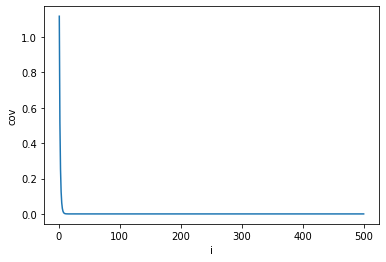

In [131]:
import seaborn as sns

data = pd.DataFrame(data=zip([*range(1, 501)],res), columns=['i', 'cov'])
sns.lineplot(data=data, x="i", y="cov")

In [135]:
np.linalg.matrix_power(T, 31)

array([[0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667],
       [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667],
       [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667],
       [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667],
       [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667],
       [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667]])

#### 4.E - Bonus
Let $\bar{X_n}$ be the sample average for a single trajectory of length $n$.
1. Show that **in our case**:
$$E(\bar{X_n}) =E(X_0)$$
What is it in our case ($\pi_0$ and $T$ as defined above)?
2. Show that 
$$Var(\bar{X_n}) = \frac{1}{n}\sigma_0^2 + \frac{2}{n^2}\sum_{d=1}^{n-1}(n-d)Cov(X_0, X_d)$$
Calculate it for our case.
3. Formulate the CLT for Markov Chains.
4. Graphically show that the CLT holds for n=500 in our case.

### Question 5 - Sampling of Kendall correlation (15 points)

Recall that the Naive time complexity of computing Kendall correlation is $O(n^2)$. We will investigate a sampling approach to approximate Kendall correlations efficiently. 

#### 5.A
Draw a sample of 10M samples from a bivariate distribution $(X,Y)\sim \mathcal{N}(\bf{0},S)$ with the covariance matrix $S=\begin{pmatrix} 2 & 3\\ 3 & 5 \end{pmatrix}$. <br>
Calculate the Kendall correlation $\tau(X,Y)$.
How long did this calculation take?

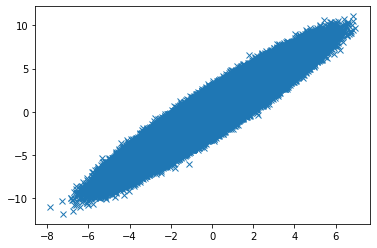

CPU times: user 5.82 s, sys: 524 ms, total: 6.35 s
Wall time: 6.05 s


In [3]:
%%time
import matplotlib.pyplot as plt
import numpy as np
MIL_ONE = 10000000

mean = [0, 0]
cov = [[2, 3], [3, 5]]

x, y = np.random.multivariate_normal(mean, cov, MIL_ONE).T
plt.plot(x, y, 'x')
# plt.axis('equal')
plt.show()

In [4]:
x[0], y[0]

(-0.8606682316018294, -1.5121072622014844)

#### 5.B
Sample 1,000 points from the data and calculate the Kendall correlation $\tau(U,V)$. 

In [12]:
import math
from math import comb
from random import sample


def get_samples(x, y, sample_size=1000, x_enumerated=False):
    enumerate_x = x    
    if not x_enumerated:
        enumerate_x = list(enumerate(x))
    x_sampled_with_idx = sample(enumerate_x, sample_size)
    idxes, xs = [x_idx[0] for x_idx in x_sampled_with_idx], [x_idx[1] for x_idx in x_sampled_with_idx]
    ys = list(y[idxes])
    return xs, ys
#     return [(round(sample[0],3), round(sample[1],3)) for sample in zip(xs, ys)]


def run_experiments(enumerate_x, y, sample_size=1000, num_of_experiments=1000):
    kendall_tau_values = []
    print(f"Running on sample size:{sample_size}")
    for idx, i in enumerate(range(num_of_experiments), start=1):
        xs, ys = get_samples(enumerate_x, y, sample_size, x_enumerated=True)
        tau, p_value = stats.kendalltau(xs, ys)
        kendall_tau_values.append(tau)
        assert(len(xs) == sample_size)
        
    return kendall_tau_values

def plot_experiment(mu, sigma, true_tau):
    bins=20
    print(f"Empirical Mean = {round(mu,3)} STD = {round(sigma,3)}, True Tau = {true_tau}")
    ax = sns.distplot(kendall_tau_values, bins=25, kde_kws=dict(bw=0.5), hist_kws= dict(edgecolor="k"))
    ax.set(xlabel='bins', ylabel='Frequency')

    plt.axvline(x=round(true_tau, 3), color='red', linestyle='-', lw=3)
    plt.axvline(x=round(mu,3)+round(sigma,3), color='green', linestyle='-', lw=3)
    plt.axvline(x=round(mu,3)-round(sigma,3), color='green', linestyle='-', lw=3)
    plt.show()
    

Kendall tau value is: KendalltauResult(correlation=0.7834834834834834, pvalue=2.9207347711988005e-301), For this set of points:


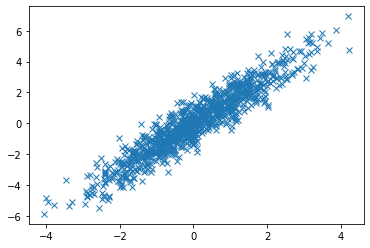

In [8]:
# samples = get_samples(x,y)
# print(f"Kendall tau value is: {my_kendalltau(samples)}, For this set of points:")
xs, ys = get_samples(x,y)
print(f"Kendall tau value is: {kendalltau(xs, ys)}, For this set of points:")

import matplotlib.pyplot as plt

plt.plot(xs, ys, 'x')
# plt.axis('equal')
plt.show()

In [15]:
import scipy.stats as stats

tau, p_value = stats.kendalltau(x, y)
true_tau = round(tau, 3)
true_tau

0.795

#### 5.C
Repeat Section 5.B 1000 times and plot a histogram of the calculated $\tau(U,V)$ values. Indicate the true $\tau(X,Y)$ (calculated on the entire 10M samples) on the histogram. What are the empirical mean and stadard deviation of the calculated $\tau(U,V)$ values?

Running on sample size:1000
Empirical Mean = 0.795 STD = 0.007, True Tau = 0.795


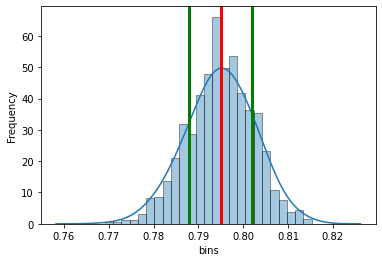

In [16]:
n_times = 1000
enumerate_x = list(enumerate(x))
kendall_tau_values = run_experiments(enumerate_x, y, num_of_experiments=n_times)
(mu, sigma) = norm.fit(kendall_tau_values)
plot_experiment(mu, sigma, true_tau)

#### 5.D
Repeat Section 5.C for samples of $m={10, 50, 100, 500, 1000, 5000}$ points. <br>
What is the naive time complexity of each calculation? <br>
Compare the empirical mean and the standard deviation of the calucated values to the size of the sample.

Running on sample size:10
Empirical Mean = 0.788 STD = 0.115, True Tau = 0.7951196715234872


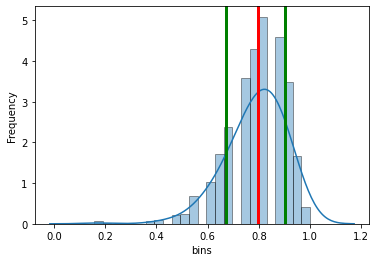

Running on sample size:50
Empirical Mean = 0.796 STD = 0.034, True Tau = 0.7951196715234872


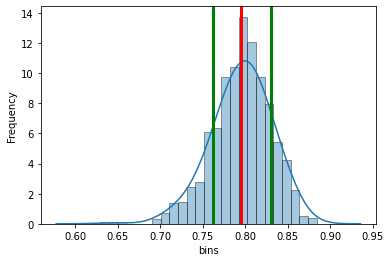

Running on sample size:100
Empirical Mean = 0.793 STD = 0.024, True Tau = 0.7951196715234872


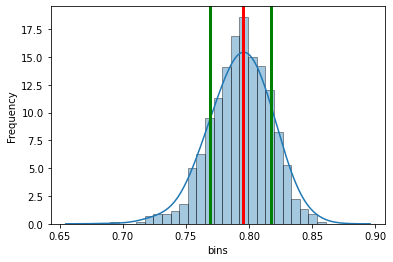

Running on sample size:500
Empirical Mean = 0.796 STD = 0.01, True Tau = 0.7951196715234872


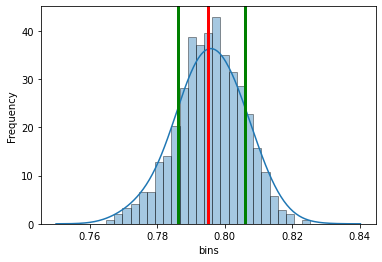

Running on sample size:1000
Empirical Mean = 0.795 STD = 0.007, True Tau = 0.7951196715234872


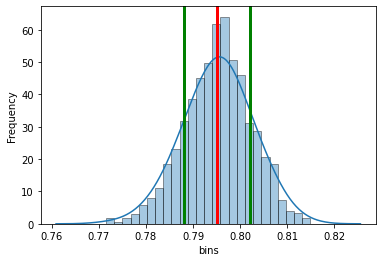

Running on sample size:5000
Empirical Mean = 0.795 STD = 0.003, True Tau = 0.7951196715234872


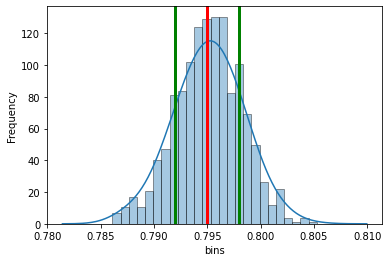

In [23]:
import time

n_times = 1000
sample_sizes=[10,50,100,500,1000,5000]

times, sigmas = [], []

true_tau, true_p_value = stats.kendalltau(x, y)
enumerate_x = list(enumerate(x))
for sample_size in sample_sizes:
    start_time = time.time()
    kendall_tau_values = run_experiments(enumerate_x, y, sample_size=sample_size, num_of_experiments=n_times)
    times.append((time.time() - start_time)*1000)
    (mu, sigma) = norm.fit(kendall_tau_values)
    sigmas.append(sigma)
    plot_experiment(mu, sigma, true_tau)

In [67]:
from math import log

sample_sizes=[10,50,100,500,1000,5000]

def plot_sample_size_vs_other(sample_sizes, res_1, res_2, label_1_name, label_2_name):
    fig, axs = plt.subplots(1, 1, figsize=(12, 6))

    lns1 = axs.plot(sample_sizes, res_1, '--bo', label=label_1_name)
    axs.set_xlabel('X')
    axs.set_ylabel(label_1_name)

    axs_sec = axs.twinx()        
    lns2 = axs_sec.plot(sample_sizes, res_2, '--ro', label=label_2_name)

    axs_sec.set_ylabel(label_2_name)
    lns = lns1+lns2
    labs = [l.get_label() for l in lns]
    axs.legend(lns, labs, loc="upper center")
    plt.show()

#### First Graph - Empirical Time vs STD

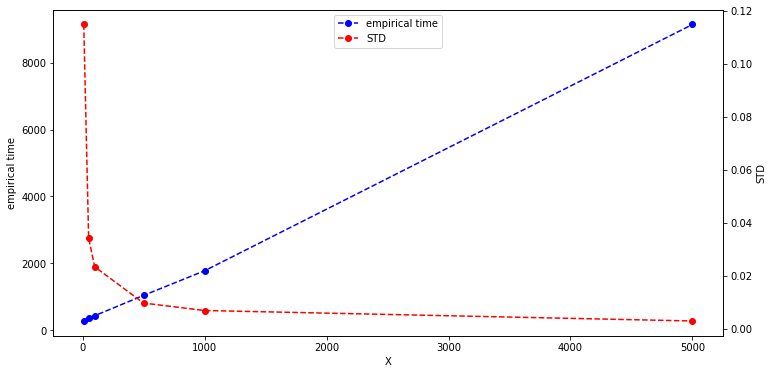

In [68]:
plot_sample_size_vs_other(sample_sizes, times, sigmas, "empirical time", "STD")

#### Second Graph - log Empirical Time vs STD
We also decided to look at STD vs log2 on the empirical time (because the method we assume is based on merge sort - nlogn time complexity)
We think it shows a better representation of the time it takes for sample size vs STD

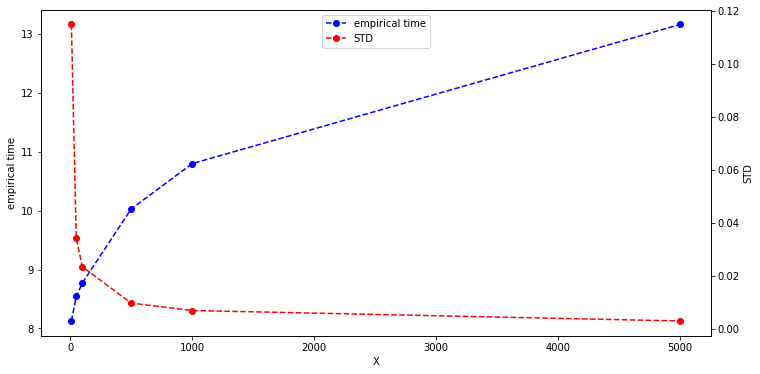

In [69]:
from math import log
log_time = [log(s,2) for s in times]
plot_sample_size_vs_other(sample_sizes, log_time, sigmas, "log2 empirical time", "STD")

#### 5.E
A coleague found an old dataset which she believes originated from the same popuation as the data in Section 5.A. The dataset is avaialble as "Kendall_data.csv". 

Using Kendall correlation and your answer to Section 5.D, how much confidence do you have in rejecting your coleague's claim? Explain your answer and show your calculation.

In [350]:
import pandas as pd
import scipy.stats as stats

df = pd.read_csv('Kendall_data.csv', header=None, names=['x1','x2'])
x1, x2 = df['x1'].to_numpy(), df['x2'].to_numpy()
x1, x2



tau, _ = stats.kendalltau(x1, x2)
true_tau = round(tau, 3)
true_tau

0.781

In [4]:
from math import sqrt

p = 0.795
p_hat = 0.781
z = 1.96
n = 100

p_hat + z*sqrt(p*(1-p)/n)

0.8601255180077831

In [5]:
p_hat - z*sqrt(p*(1-p)/n)

0.7018744819922169

In [ ]:
0.7950815318261533